In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data = pd.read_csv("machine.data_update.csv")

# 데이터 탐색
print(data.head())
print(data.info())
print(data.describe())

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

In [21]:
# 필요없는 열 제거
data = data.drop(["VendorName", "ModelName"], axis=1)

# 결측값 확인
print(data.isnull().sum())

# 수치형 데이터 스케일링
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# 데이터 확인
print(data_scaled.head())

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64
       MYCT      MMIN      MMAX      CACH     CHMIN     CHMAX       PRP  \
0 -0.303586 -0.675026 -0.495462  5.694208  1.661989  4.231033  0.575759   
1 -0.673330  1.326291  1.727049  0.167629  0.485509  0.529479  1.018277   
2 -0.673330  1.326291  1.727049  0.167629  0.485509  0.529479  0.712877   
3 -0.673330  1.326291  1.727049  0.167629  0.485509  0.529479  0.413710   
4 -0.673330  1.326291  0.359350  0.167629  0.485509 -0.087447  0.164405   

        ERP  
0  0.645587  
1  0.995359  
2  0.995359  
3  0.995359  
4  0.211611  


In [22]:
# 특성과 타겟 분리
X = data_scaled.drop("PRP", axis=1)
y = data_scaled["PRP"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# 학습 데이터에 대한 평가
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Evaluation:")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R^2 Score: {r2_train}")

# 테스트 데이터에 대한 평가
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Set Evaluation:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R^2 Score: {r2_test}")

# 교차 검증 점수
cv_scores_mse = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # Negative MSE를 양수로 변환

cv_scores_mae = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_scores_mae = -cv_scores_mae  # Negative MAE를 양수로 변환

cv_scores_r2 = cross_val_score(model, X, y, cv=10, scoring='r2')

print(f"Cross-validation MSE Scores: {cv_scores_mse}")
print(f"Mean CV MSE Score: {cv_scores_mse.mean()}")

print(f"Cross-validation MAE Scores: {cv_scores_mae}")
print(f"Mean CV MAE Score: {cv_scores_mae.mean()}")

print(f"Cross-validation R^2 Scores: {cv_scores_r2}")
print(f"Mean CV R^2 Score: {cv_scores_r2.mean()}")

Training Set Evaluation:
Mean Squared Error: 0.05939613256881661
Mean Absolute Error: 0.14479841721539094
R^2 Score: 0.9204648044109383
Test Set Evaluation:
Mean Squared Error: 0.09206845898295865
Mean Absolute Error: 0.19574383121008587
R^2 Score: 0.9534424890368547
Cross-validation MSE Scores: [0.1707256  0.22187291 0.0161595  0.03208434 0.10320655 0.00318483
 0.02505047 0.11851038 0.07300961 0.41243177]
Mean CV MSE Score: 0.11762359561188736
Cross-validation MAE Scores: [0.26847317 0.25096823 0.0842094  0.11088203 0.20647765 0.0454502
 0.12369908 0.2687456  0.13518509 0.32654002]
Mean CV MAE Score: 0.18206304600805118
Cross-validation R^2 Scores: [0.93717062 0.28066002 0.52213677 0.74092163 0.85803719 0.91289189
 0.04312544 0.87308877 0.26045567 0.87995405]
Mean CV R^2 Score: 0.6308442045473646


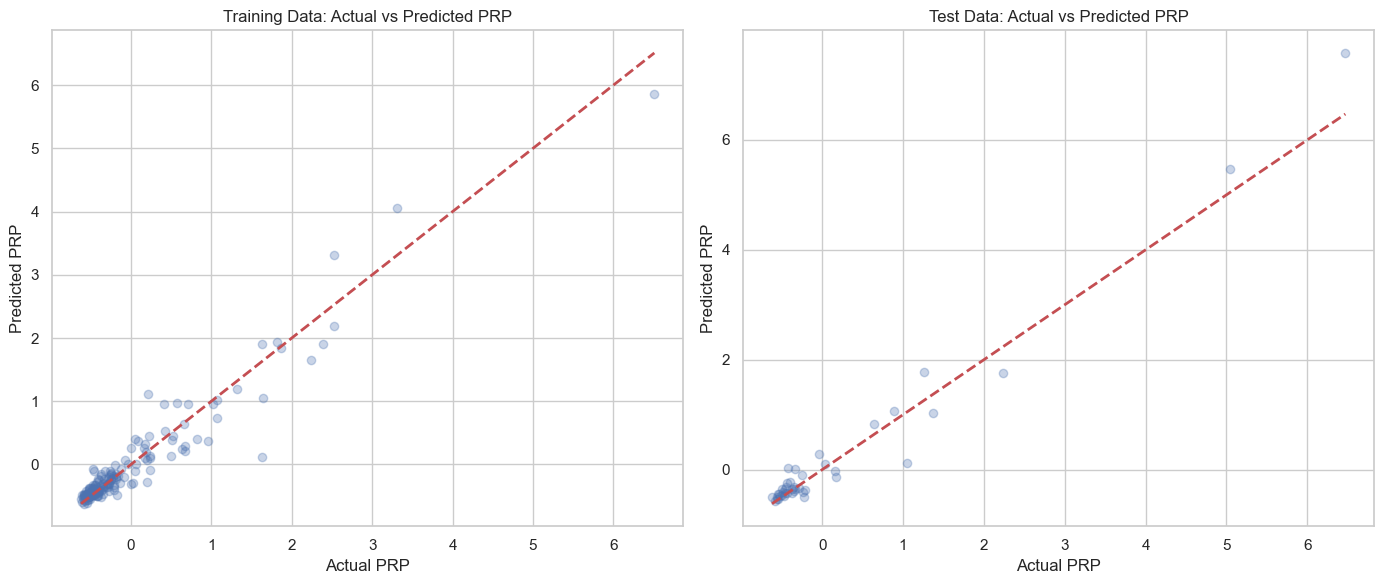

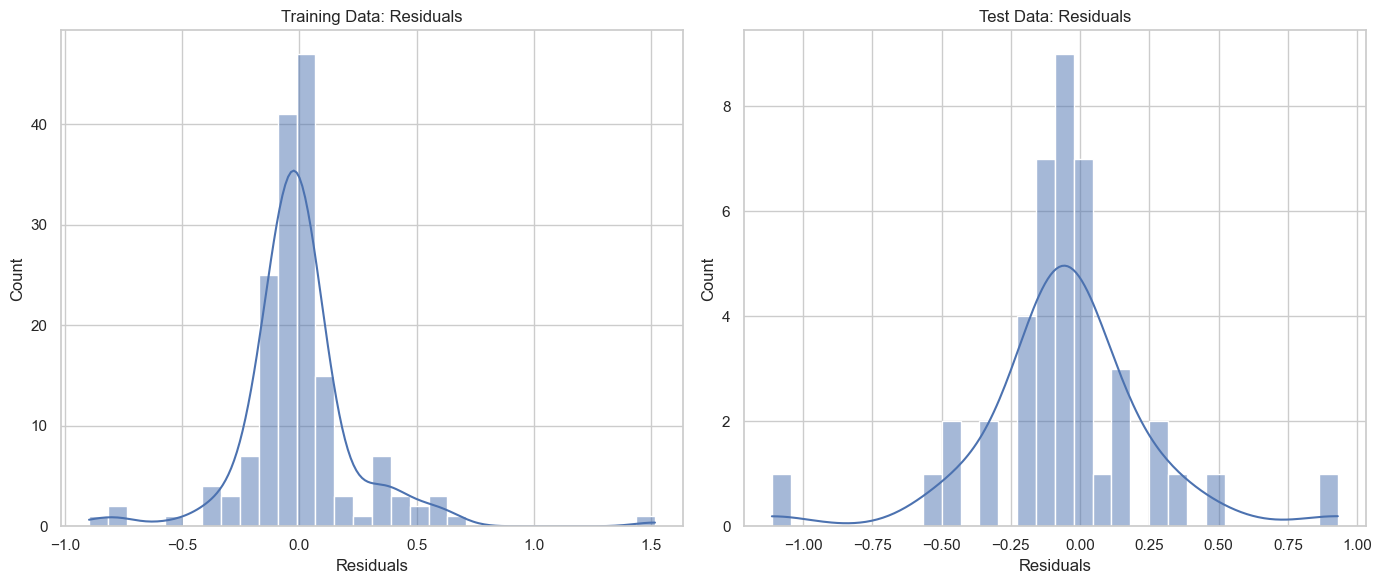

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위해 seaborn 스타일 사용
sns.set(style="whitegrid")

# 학습 데이터에 대한 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Training Data: Actual vs Predicted PRP')

# 테스트 데이터에 대한 실제 값과 예측 값 비교 시각화
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Test Data: Actual vs Predicted PRP')

plt.tight_layout()
plt.show()

# 학습 데이터와 테스트 데이터에 대한 잔차(오차) 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train - y_train_pred, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Training Data: Residuals')

plt.subplot(1, 2, 2)
sns.histplot(y_test - y_test_pred, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Test Data: Residuals')

plt.tight_layout()
plt.show()